## Derivation for the dot product of 3D rotational gradient operator acted on spherical harmonics 

Chak-Pong Chung, chakpongchung@gmail.com

# What problems does it solve?

To the best of our knowledge, it is the first time this dot product is simplified. As you can compare, now the computation is much more simpler since the number of integral within the unit sphere(the alpha terms) are only 1/3 of the original. It significantly accelerate the computation for dot product between two rotational gradient. Some numerical experiment like parameter search or approximate real-time computation is now possible.


Application here:

Simulation of crystal growth in material science.  

Potentially Others:  

Object/scenes response to a lighting environment, often represented using spherical harmonics,including complex global illumination effects.  

Using Spherical Harmonics to represent irradiance environment maps efficiently, allowing for interactive rendering of diffuse objects under distant illumination.  

# Spherical Harmonics in Sympy

To obtain the expressions in spherical coordinates we use full expansion:

In [98]:
from sympy import Ynm, Symbol, expand_func
from sympy.abc import n,m
theta = Symbol("theta")
phi = Symbol("phi")
expand_func(Ynm(n, m, theta, phi))

    _____________________                                    
   ╱ (2⋅n + 1)⋅(-m + n)!   ⅈ⋅m⋅φ                             
  ╱  ─────────────────── ⋅ℯ     ⋅assoc_legendre(n, m, cos(θ))
╲╱         (m + n)!                                          
─────────────────────────────────────────────────────────────
                             2⋅√π                            

Spherical harmonics for illustration


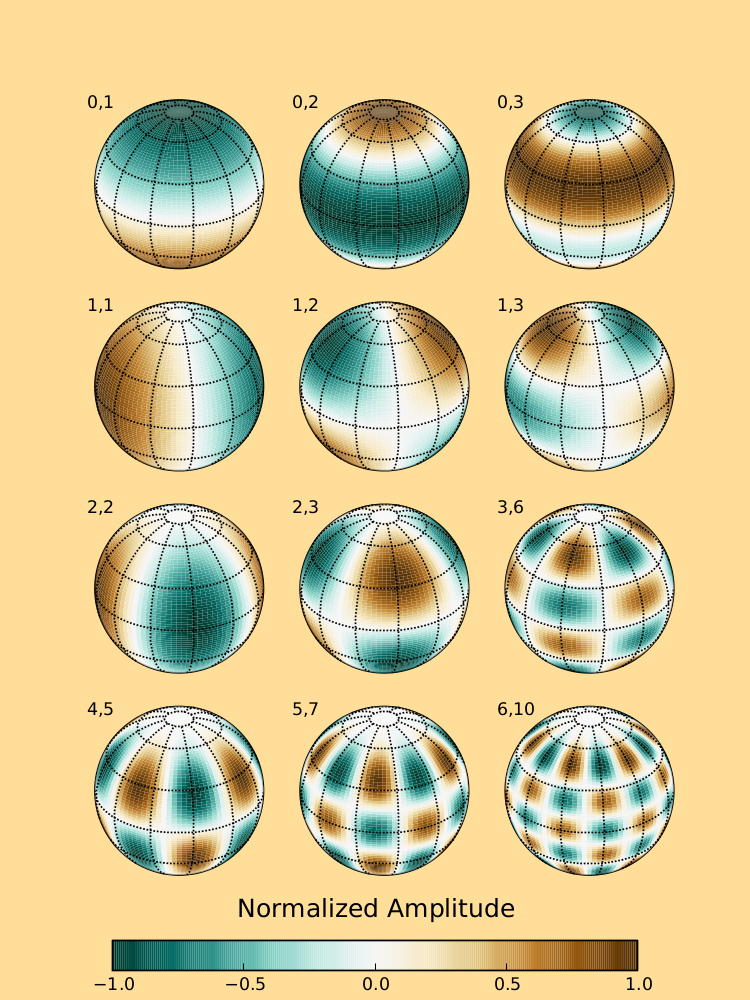

In [99]:
''' Generates a sampling of spherical harmonics for illustration of
    their properties'''

from IPython.core.display import Image, display

display(Image('http://stsdas.stsci.edu/download/mdroe/plotting/_images/entry1.png', unconfined=True))


# Dot Product of Rotational Gradients

Now We are going to to derive the dot product of rotational gradient of spherical harmonics with spherical harmonics expansion.


$$\vec{R} = \begin{bmatrix}
           R_{x}\\
           R_{y} \\
           R_{z}
         \end{bmatrix}
         =\begin{bmatrix}
           -  \frac{cos\theta}{sin\theta}cos\phi \frac{\partial }{\partial \phi}  - sin\phi \frac{\partial }{\partial \theta}
           \\
           -  \frac{cos\theta}{sin\theta}cos\phi \frac{\partial }{\partial \phi}  + cos\phi \frac{\partial }{\partial \theta} 
           \\
           \frac{\partial }{\partial \phi} 
         \end{bmatrix}
         $$

$$
R_{\alpha} = i L_{\alpha}, where \, \alpha = x,y,z
$$

So the rotational gradient operator is now:

$$ \vec{R} = \begin{bmatrix}
           R_{x} \\
           R_{y} \\
           R_{z}
         \end{bmatrix}
        =
         \begin{bmatrix}
           i L_{x} \\
           i L_{y} \\
           i L_{z}
         \end{bmatrix}
                  =
         \begin{bmatrix}
           \frac{i}{2}(L_{+}+L_{-} ) \\
           \frac{1}{2}(L_{+}-L_{-} )  \\
           i L_{z}
         \end{bmatrix}
        $$

$$
L_{+} Y{_l^{m}}= c_{l,m,1} Y{_l^{m+1}}
$$

$$
L_{-} Y{_l^{m}}= c_{l,m,2} Y{_l^{m-1}}
$$

$$
L_{z} Y{_l^{m}}= m Y{_l^{m}}
$$

after some manipulations of the above identities, it can be shown that  (details will be added later)

$$ \vec{R}Y{_j^{p}} \cdot \vec{R}Y{_l^{m}} = -  \frac{1}{2} [c_{j,p,1}c_{l,m,2}Y{_j^{p+1}} Y{_l^{m-1}}+c_{j,p,2}c_{l,m,1}Y{_j^{p-1}}Y{_l^{m+1}}] - mp Y{_j^{p}} Y{_l^{m}} $$ 

$$ =(-1)*(-1)^{m+p} \sum\limits_{k=|l-j|}^{l+j}Y{_k^{m+p}}[\frac{1}{2} (c_{j,p,1}c_{l,m,2} \alpha_{l,m-1,j,p+1,k} +c_{j,p,2}C_{l,m,1}\alpha_{l,m+1,j,p-1,k}) + mp \alpha_{l,m,j,p,k}] $$

where $$ \alpha_{l,m,j,p,k} = \int_{0}^{2\pi}  \int_{0}^{\pi} Y{_j^{p}}  Y{_l^{m}} Y{_k^{-m-p}} \sin \theta  d\theta d\phi$$

$$ =[\frac{(2l+1)(2j+1)(2k+1)}{4\pi}]^{1/2} *   \left(\begin{array}{clcr} j & l & k\\ 0& 0 & 0      \end{array}\right)  *   \left(\begin{array}{clcr} j & l & k\\ p& m & -(m+p)      \end{array}\right)        $$   

and 
$$
\left(\begin{array}{clcr} j & l & k\\ 0& 0 & 0      \end{array}\right)
$$ is a Wigner 3j symbol

# Why is the above formula slow in computation?

This formula is computationally expensive since it calculates different integral in the unit sphere(the alpha term) many times. The heaviness of the computation comes from evaluating the Wigner 3j symbol, which involves calculating the factorial, a notoriusly expensive calculations. It also introduces rounding errors during iteration.

# Examples of Wigner 3j symbol



In [100]:
from sympy.physics.wigner import wigner_3j
wigner_3j(2, 6, 4, 0, 0, 1)

0

In [101]:
wigner_3j(2, 6, 4, 0, 0, 0)

√715
────
143 

# Main Ideas of the Derivation

$$
  Y{_j^{p}} = Y{_j^{p}}(\theta, \phi)
$$

$$
c_{l,m,1}=\sqrt{(l-m)(l+m+1)}
$$

$$
c_{l,m,2}=\sqrt{(l+m)(l-m+1)}
$$

It can be shown that:  (more details can be added if necessary) ,

  $$ \frac{1}{2} (c_{j,p,1}c_{l,m,2} \alpha_{l,m-1,j,p+1,k} +c_{j,p,2}C_{l,m,1}\alpha_{l,m+1,j,p-1,k}) + mp \alpha_{l,m,j,p,k} $$  

$$ =\frac{1}{2}[\frac{(2l+1)(2j+1)(2k+1)}{4\pi}]^{1/2} *   \left(\begin{array}{clcr} j & l & k\\ 0& 0 & 0      \end{array}\right)  *  [ c_{j,p,1}c_{l,m,2}  \left(\begin{array}{clcr} j & l & k\\ p+1& m-1 & -(m+p)      \end{array}\right)  +  c_{j,p,2}c_{l,m,1}  \left(\begin{array}{clcr} j & l & k\\ p-1& m+1 & -(m+p)      \end{array}\right)  + 2mp  \left(\begin{array}{clcr} j & l & k\\ p-1& m+1 & -(m+p)      \end{array}\right)      ] $$   

$$ = \frac{1}{2}[\frac{(2l+1)(2j+1)(2k+1)}{4\pi}]^{1/2} *   \left(\begin{array}{clcr} j & l & k\\ 0& 0 & 0      \end{array}\right)  *  \left(\begin{array}{clcr} k & j & l\\ -(m+p)& p & m      \end{array}\right)  *(k^2-j^2-l^2+k-j-(-2pm+2pm))  $$ 

 $$ = \frac{1}{2}[\frac{(2l+1)(2j+1)(2k+1)}{4\pi}]^{1/2} * \left(\begin{array}{clcr} k & j & l\\ 0& 0 & 0      \end{array}\right)  *  \left(\begin{array}{clcr} k & j & l\\ -(m+p)& p & m      \end{array}\right)  *(k^2-j^2-l^2+k-j-l) $$  

$$ = \alpha_{l,m,j,p,k} * \frac{1}{2} (k^2-j^2-l^2+k-j-l)  $$ 

so, we have 


$$ \vec{R}Y{_j^{p}} \cdot \vec{R}Y{_l^{m}}  =  (-1)^{m+p} \sum\limits_{k=|l-j|}^{l+j}Y{_k^{m+p}}  * \alpha_{l,m,j,p,k} * \frac{1}{2} (k^2-j^2-l^2+k-j-l)  $$

# How is it faster now?

 As you can compare, now the computation is much more simpler since the number of integral within the unit sphere(the alpha terms) are only 1/3 of the original. To the best of our knowledge, it is the first time this dot product is derived and documented.

# Numerical Expriments

In [102]:
from sympy import *
from sympy.physics.wigner import wigner_3j
init_printing(use_latex='mathjax')

def dot_rota_grad_SH(j, p, l, m, theta, phi):
    temp=0
    for k in range(abs(l-j), l+j +1):
        temp+=Ynm(k, m+p, theta,phi)*alpha(l,m,j,p,k)/2*(k**2-j**2-l**2+k-j-l)

    return (-S(1))**(m+p)*temp

def alpha(l,m,j,p,k):
    return sqrt((2*l+1)*(2*j+1)*(2*k+1)/(4*pi))*wigner_3j(j, l, k, 0, 0, 0)*wigner_3j(j, l, k, p, m, -m-p)


print dot_rota_grad_SH(2,6,2,2,0,0)

0


In [103]:
from sympy import Ynm, init_printing, Expr, var, sympify, Dummy, S, Sum, sqrt, pi
from sympy.physics.wigner import wigner_3j


In [104]:
class Wigner3j(Expr):
    def doit(self, **hints):
        num = True
        for i in range(6):
            if not self.args[i].is_number:
                num = False
        if num:
            return wigner_3j(*self.args)
        else:
            return self

def alpha(l,m,j,p,k):
    return sqrt((2*l+1)*(2*j+1)*(2*k+1)/(4*pi)) * Wigner3j(j, l, k, S(0), S(0), S(0))*Wigner3j(j, l, k, p, m, -m-p)

def dot_rota_grad_SH(j, p, l, m, theta, phi):
    j = sympify(j)
    p = sympify(p)
    l = sympify(l)
    m = sympify(m)
    theta = sympify(theta)
    phi = sympify(phi)
    k = Dummy("k")
    return (-S(1))**(m+p) * Sum(Ynm(k, m+p, theta, phi)*alpha(l,m,j,p,k)/2 *(k**2-j**2-l**2+k-j-l), (k, abs(l-j), l+j))

In [105]:
var("j p l m theta phi")
#dot_rota_grad_SH(1, 5, 1, 1, 1, 2)
dot_rota_grad_SH(2,0,2,1,theta,phi)

   4                                                                          
  ____                                                                        
  ╲                                                                           
   ╲     ___________ ⎛ 2         ⎞                                            
    ╲  ╲╱ 50⋅k + 25 ⋅⎝k  + k - 12⎠⋅Ynm(k, 1, θ, φ)⋅Wigner3j(2, 2, _k, 0, 0, 0)
-   ╱  ───────────────────────────────────────────────────────────────────────
   ╱                                                   4⋅√π                   
  ╱                                                                           
  ‾‾‾‾                                                                        
 k = 0                                                                        

                             
                             
                             
                             
⋅Wigner3j(2, 2, _k, 0, 1, -1)
─────────────────────────────
                             

In [106]:
print _.doit()

-3*sqrt(5)*Ynm(2, 1, theta, phi)/(14*sqrt(pi)) + 2*sqrt(30)*Ynm(4, 1, theta, phi)/(7*sqrt(pi))


In [107]:
_.expand(func=True)

   4                                                                          
 _____                                                                        
 ╲                                                                            
  ╲    ⎛                     _________________________                        
   ╲   ⎜ 2   ___________    ╱ 2⋅k⋅(k - 1)!   (k - 1)!   ⅈ⋅φ                   
    ╲  ⎜k ⋅╲╱ 50⋅k + 25 ⋅  ╱  ──────────── + ──────── ⋅ℯ   ⋅assoc_legendre(k, 
-   ╱  ⎜                 ╲╱     (k + 1)!     (k + 1)!                         
   ╱   ⎜──────────────────────────────────────────────────────────────────────
  ╱    ⎝                                                                   8⋅π
 ╱                                                                            
 ‾‾‾‾‾                                                                        
 k = 0                                                                        

                                                   

In [108]:
for j in range(2):
    for p in range(-j, j+1):
        for l in range(2):
            for m in range(-l, l+1):
                print j, p, l, m, dot_rota_grad_SH(j, p, l, m, theta, phi).doit()

0 0 0 0 0
0 0 1 -1 0
0 0 1 0 0
0 0 1 1 0
1 -1 0 0 0
1 -1 1 -1 sqrt(30)*exp(-4*I*phi)*Ynm(2, 2, theta, phi)/(10*sqrt(pi))
1 -1 1 0 -sqrt(15)*exp(-2*I*phi)*Ynm(2, 1, theta, phi)/(10*sqrt(pi))
1 -1 1 1 Ynm(0, 0, theta, phi)/sqrt(pi) + sqrt(5)*Ynm(2, 0, theta, phi)/(10*sqrt(pi))
1 0 0 0 0
1 0 1 -1 -sqrt(15)*exp(-2*I*phi)*Ynm(2, 1, theta, phi)/(10*sqrt(pi))
1 0 1 0 -Ynm(0, 0, theta, phi)/sqrt(pi) + sqrt(5)*Ynm(2, 0, theta, phi)/(5*sqrt(pi))
1 0 1 1 sqrt(15)*Ynm(2, 1, theta, phi)/(10*sqrt(pi))
1 1 0 0 0
1 1 1 -1 Ynm(0, 0, theta, phi)/sqrt(pi) + sqrt(5)*Ynm(2, 0, theta, phi)/(10*sqrt(pi))
1 1 1 0 sqrt(15)*Ynm(2, 1, theta, phi)/(10*sqrt(pi))
1 1 1 1 sqrt(30)*Ynm(2, 2, theta, phi)/(10*sqrt(pi))


# References

Wigner 3j symbol  
http://docs.sympy.org/dev/modules/physics/wigner.html  
Visualization of spherical harmonics   
http://stsdas.stsci.edu/download/mdroe/plotting/entry1/index.html  
relevant page:  
http://docs.sympy.org/latest/modules/functions/special.html?highlight=spherical%20harmonics#sympy.functions.special.spherical_harmonics.Ynm  
Brief summary about spherical harmonics:  
http://mathworld.wolfram.com/SphericalHarmonic.html  
Olver, Frank WJ. NIST Handbook of Mathematical Functions Hardback and CD-ROM. Cambridge University Press, 2010.  
http://dlmf.nist.gov/  